# Biodiversity in National Parks
The goal of this project is to anaylze data on the conservation statuses of endangered species and investigate if there are any patterns or themes to the types of species that become endangered.

This project will seek to answer the following questions:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be protected?
- Are the differences between species and their conservation status significant?
- Where were the most species observed? What was the most observed species?

#### Data Sources
Both Observations.csv and Species_info.csv were provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is inspired by real data, but is mostly fictional.

This project was completed as part of the Codecademy Data Science Career Path Certificate program. 

## Import Libraries
Import pandas, pyplot, and seaborn to support data manipulation and visualization.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load the Data
The data provided for the project was saved to two csv files named **species_info.csv** and **observations.csv**. The following code reads the data and saves each csv file's data to a dataframe.

#### species
The species dataframe contains data about different species and their conservation status.

The columns in the dataset include:
- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status

In [2]:
species = pd.read_csv('species_info.csv')
species.sample(5)

,category,scientific_name,common_names,conservation_status
1501,Vascular Plant,Galium circaezans,Wild Licorice,NaN
1771,Vascular Plant,Acalypha virginica,"Virginia Copperleaf, Virginia Threeseed Mercury",NaN
3090,Bird,Bucephala islandica,Barrow's Goldeneye,NaN
5206,Vascular Plant,Asclepias californica,"California Milkweed, Round-Hood Milkweed, Wool...",NaN
3849,Vascular Plant,Hedysarum alpinum var. americanum,American Alpine Sweetvetch,NaN


#### observations

The observations dataframe holds recorded sightings of different species at several national parks for the past 7 days.

The columns in the datset include:
- **scientific_name** - the scientific name of each species
- **park_name** - Park where species were found
- **observations** - the number of times each species was observed at park

In [3]:
observations = pd.read_csv('observations.csv')
observations.sample(5)

,scientific_name,park_name,observations
22874,Lepidium sativum,Bryce National Park,90
21375,Veronica serpyllifolia ssp. humifusa,Yosemite National Park,111
3475,Epipactis gigantea,Yosemite National Park,137
6878,Rhamnus ilicifolia,Great Smoky Mountains National Park,111
10144,Lupinus adsurgens,Yellowstone National Park,253


#### Data Characteristics
Characteristics of each dataset are explored below.
- The species data set contains 5,824 rows and 4 columns.
- The observations data set contains 23,296 rows and 3 columns.

In [4]:
print('species shape: ' + str(species.shape))
print('observations shape: ' + str(observations.shape))

species shape: (5824, 4)
observations shape: (23296, 3)


## Data Exploration
#### species
- 77% of the species fall under the category 'Vascular Plant'.
- 84% of species have a reported conservation status of 'Species of Concern'. 
- The dataset includes four categories of species: Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, and Nonvascular Plant.
- The dataset includes three conservation statuses: Species of Concern, Endangered, Threatened, In Recovery
- The majority of the conservation status column is 'nan' values, indicating the species is not under conservation status.
    - The datset was updated to change 'nan' values to 'No Intervention'.

In [5]:
print(species.describe())

              category scientific_name   common_names conservation_status
count             5824            5824           5824                 191
unique               7            5541           5504                   4
top     Vascular Plant   Columba livia  Dicranum Moss  Species of Concern
freq              4470               3              7                 161


In [6]:
species.groupby('category').size().sort_values()

category
Reptile                79
Amphibian              80
Fish                  127
Mammal                214
Nonvascular Plant     333
Bird                  521
Vascular Plant       4470
dtype: int64

In [7]:
species['conservation_status'].fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size().sort_values()

conservation_status
In Recovery              4
Threatened              10
Endangered              16
Species of Concern     161
No Intervention       5633
dtype: int64

#### observations
- The minimum and maximum number of observations made of a species are 9 and 321, respectively. The average is 142.
- A total of 3,314,739 observations were made over the 7 days.
- The dataset includes four national parks: Great Smoky Mountains, Yosemite, Bryce, and Yellowstone
- An equal number of species were observed from each park.

In [8]:
print(observations.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [9]:
print(observations.observations.sum())

3314739


In [10]:
print(observations.describe(include=[object]))

       scientific_name                  park_name
count            23296                      23296
unique            5541                          4
top        Canis lupus  Yellowstone National Park
freq                12                       5824


In [11]:
print(observations.groupby('park_name').size())

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


## Analysis
#### Protected Species
- Birds have the highest count of protected species, while Nonvascular Plants and Reptiles have the lowest count.
- Though Birds have the highest number of protected species, Mammals have the highest percentage of protected species.

In [12]:
species['is_protected'] = species.conservation_status != 'No Intervention'
categories = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index().pivot(columns='is_protected',index='category', values='scientific_name')\
                        .reset_index()
categories.columns = ['category', 'not_protected', 'protected']
categories['perc_protected'] = categories.protected/(categories.protected + categories.not_protected) * 100
categories = categories.sort_values('perc_protected', ascending=False).reset_index(drop=True)
categories

,category,not_protected,protected,perc_protected
0,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
2,Amphibian,72,7,8.860759
3,Fish,115,11,8.730159
4,Reptile,73,5,6.410256
5,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


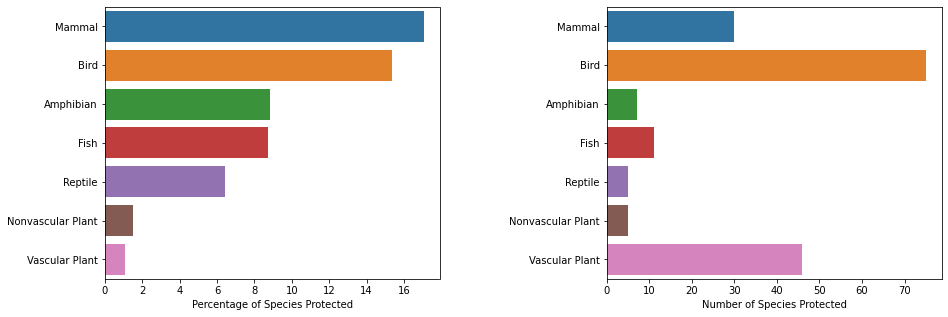

In [13]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(data=categories, x='perc_protected', y='category')
plt.xlabel('Percentage of Species Protected')
plt.ylabel('')

plt.subplot(1,2,2)
sns.barplot(data=categories, x='protected', y='category')
plt.xlabel('Number of Species Protected')
plt.ylabel('')

plt.subplots_adjust(wspace=.5)

#### Conservation Status
The four conservation statuses are defined as follows:
- **Species of Concern** - declining or appear to be in need of conservation
- **Threatened** - vulnerable to endangerment in the near future
- **Endangered** - seriously at risk of extinction
- **In Recovery** - formerly Endangered, but currently not in danger of extinction

- 84% of protected species fall under 'Species of Concern' status.
- The majority of species with 'Species of Concern' status are birds. 

In [14]:
conservation_df = species[species.conservation_status != 'No Intervention']\
.groupby(['conservation_status', 'category'])['scientific_name']\
.count().unstack()

conservation_df

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 0, '')

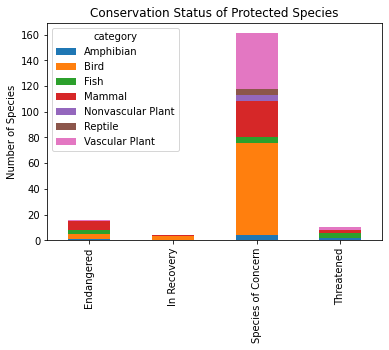

In [15]:
ax = conservation_df.plot(kind = 'bar', stacked=True)
ax.set_title('Conservation Status of Protected Species')
ax.set_ylabel("Number of Species")
ax.set_xlabel('')

#### Statistical Significance
A series of Chi Squared Contingency tests were performed to understand if one category of species is statistically more likely to be protected than another.

Statistical signifance was identified for the following comparisons:
- All categories are statistically more likely to be protected than Nonvascular and Vascular Plants.
- Mammals are statistically more likely to be protected than Reptiles.

In [18]:
categories

,category,not_protected,protected,perc_protected
0,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
2,Amphibian,72,7,8.860759
3,Fish,115,11,8.730159
4,Reptile,73,5,6.410256
5,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


In [21]:
from scipy.stats import chi2_contingency

cat1 = categories.category[:-1].values

for a in cat1:
    for b in cat1:
        if a != b:
            table = [[categories[categories.category == a].protected.values[0],\
                     categories[categories.category == a].not_protected.values[0]],\
                     [categories[categories.category == b].protected.values[0],\
                     categories[categories.category == b].not_protected.values[0]]]
            chi2 = chi2_contingency(table)
            p_val = chi2[1]
            if p_val < 0.05:
                print(str(a) + ', ' + str(b) + ' = ' + str(p_val))

Mammal, Reptile = 0.03835559022969898
Mammal, Nonvascular Plant = 1.481868915759314e-10
Bird, Nonvascular Plant = 1.0546306904975004e-10
Amphibian, Nonvascular Plant = 0.001778554820715609
Fish, Nonvascular Plant = 0.0004960633228752838
Reptile, Mammal = 0.03835559022969898
Reptile, Nonvascular Plant = 0.0336269831072617
Nonvascular Plant, Mammal = 1.481868915759314e-10
Nonvascular Plant, Bird = 1.0546306904974968e-10
Nonvascular Plant, Amphibian = 0.001778554820715609
Nonvascular Plant, Fish = 0.0004960633228752838
Nonvascular Plant, Reptile = 0.03362698310726171


#### Park Observations
The series and observation datasets were merged on the scientific name to gain more information on the species observed in the parks.

'National Park' was removed from the park names for better visualization.

In [22]:
joined = observations.merge(species, on = 'scientific_name')
joined.replace({'Yosemite National Park': 'Yosemite',
                'Bryce National Park': 'Bryce',
                'Yellowstone National Park': 'Yellowstone',
                'Great Smoky Mountains National Park': 'Smoky Mountains'}, inplace=True)
                
joined.sample(5)

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
19527,Galium pilosum,Yellowstone,218,Vascular Plant,Hairy Bedstraw,No Intervention,False
6938,Cassiope mertensiana,Bryce,80,Vascular Plant,"Western Moss Heather, White Heather",No Intervention,False
4768,Heuchera longiflora,Bryce,100,Vascular Plant,"Alumroot, Long-Flower Alumroot",No Intervention,False
15710,Festuca saximontana,Smoky Mountains,71,Vascular Plant,"Mountain Fescue, Rocky Mountain Fescue",No Intervention,False
18857,Potamogeton amplifolius,Yellowstone,254,Vascular Plant,Largeleaf Pondweed,No Intervention,False


- The most observations were made at Yosemite National Park, and the least were made at Great Smoky Mountain National Park.
- The majority of observations were of Vascular Plants.

Text(0, 0.5, 'Observations')

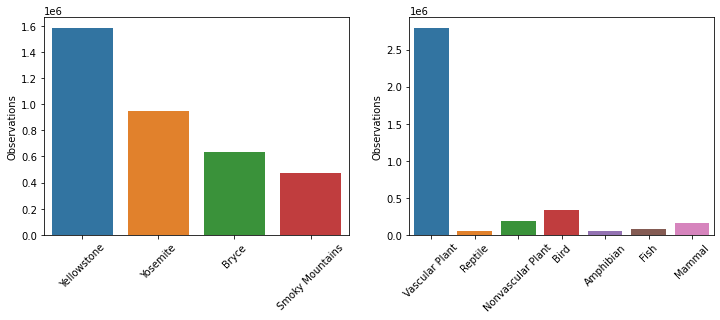

In [24]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(data=joined.sort_values('observations',ascending=False), x='park_name', y="observations", ci=None, estimator=sum)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Observations')

plt.subplot(1,2,2)
sns.barplot(data=joined.sort_values('observations',ascending=False), x='category', y="observations", ci=None, estimator=sum)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Observations')

In [25]:
joined.groupby(['category', 'park_name']).observations.sum().unstack()

park_name,Bryce,Smoky Mountains,Yellowstone,Yosemite
category,,,,
Amphibian,7542,5876,19937,11713
Bird,58590,42869,144300,86612
Fish,12823,9482,31459,19137
Mammal,28830,21056,70701,42533
Nonvascular Plant,32992,24857,83021,49783
Reptile,8141,5841,20061,11779
Vascular Plant,484373,364882,1218162,727895


## Conclusion

This project was able to answer some of the questions first posed in the beginning:
- What is the distribution of conservation status for species?
 - The majority of species were not part of conservation efforts (191/5,633 protected species).
- Are certain types of species more likely to be protected?
 - Mammals and Birds showed the highest percentage of protected species.
- Are the differences between species and their conservation status significant?
 - Yes, some species are statistically more likely to be protected than others.
- Where were the most observations made? What was the most observed species?
 - The most observations were made at Yellowstone National Park. The most observed species were those of the Vascular Plant species.

## Moving Forward
Only seven days of data were collected for the observations data. A longer observation time may provide a better representation. Additionally, there may be changes in observation with the seasons.